In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [13]:
# input parameters
fixed_cost = 30000
var_cost_min = 16
var_cost_max = 24
selling_price = 50
demand_mean = 1200
demand_std = 300
trials = 10000

In [14]:
# simulation trials
rd.seed(101010)
sample = list()
for i in range (trials):
    var_cost = rd.uniform(var_cost_min, var_cost_max)
    demand = rd.normalvariate(demand_mean, demand_std)
    total_revenue = demand*selling_price
    total_cost = demand*var_cost + fixed_cost
    profit = total_revenue - total_cost
    sample.append(profit)
    

(array([  40.,  199.,  883., 1928., 2690., 2330., 1271.,  493.,  131.,
          35.]),
 array([-24712.17430979, -18248.67212402, -11785.16993825,  -5321.66775248,
          1141.83443329,   7605.33661906,  14068.83880483,  20532.3409906 ,
         26995.84317637,  33459.34536214,  39922.84754791]),
 <a list of 10 Patch objects>)

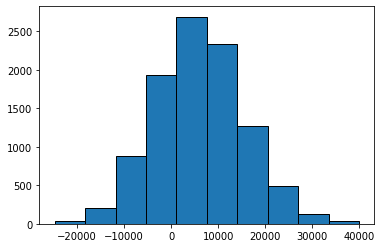

In [15]:
# problem a
plt.hist(sample, edgecolor = 'k')

In [16]:
# Find the estimate of mean profit
sample_mean = np.mean(sample)
print('The estimate of mean profit is $%5.2f' % sample_mean)

The estimate of mean profit is $6003.66


In [10]:
# Find the 95% confidence interval for the sample mean
sample_std = np.std(sample)
moe = 1.96*sample_std/len(sample)**0.5
lci = sample_mean - moe
uci = sample_mean + moe
print('Margin of error = %5.2f'% moe)
print('Lower confidence interval = %5.2f'% lci)
print('Upper confidence interval = %5.2f'% uci)
print('The 95%% confidence interval for the sample mean is (%6.2f, %6.2f)'% (lci,uci))

Margin of error = 184.47
Lower confidence interval = 5819.18
Upper confidence interval = 6188.13
The 95% confidence interval for the sample mean is (5819.18, 6188.13)


In [11]:
# problem b
# Find the probability or % of chance the company will incur a loss
proportion = sum(1 for x in sample if x < 0.0)/len(sample)
print('There is a %5.2f%% chance of incurring a loss on the order.'% (100*proportion))

There is a 26.26% chance of incurring a loss on the order.


In [12]:
# Find 90% confidence interval for the probability the company will incur a loss 
moe = 1.645*(proportion *(1 - proportion)/len(sample)**0.5)
lci = proportion - moe
uci = proportion + moe
print('Lower confidence interval = %5.2f%%'% lci)
print('Upper confidence interval = %5.2f%%'% uci)

Lower confidence interval =  0.26%
Upper confidence interval =  0.27%
